# HW 4 - NumPy + Visualization

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Task 1 (2 points).
Generate a generic 2D Gaussian-like array (Hint: checkout np.linspace function). Visualize the results.

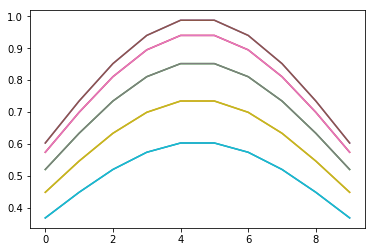

In [2]:
X, Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
D = np.sqrt(X*X+Y*Y)
sigma, mu = 1.0, 0.0
G = np.exp(-( (D-mu)**2 / ( 2.0 * sigma**2 ) ) )
plt.plot(G)
plt.show()

## Task 2  (1 point).
How to tell if a given 2D array has null columns?

In [3]:
Z = np.random.randint(0,3,(3,10))
print(Z)
print((~Z.any(axis=0)).any())

[[1 0 1 2 2 0 0 2 2 2]
 [1 1 0 1 2 0 2 2 0 2]
 [0 2 0 2 1 2 2 1 0 0]]
False


## Task 3  (1 point).
Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value? 

In [4]:
Z = np.array([1,2,3,4,5])
shift = 3
new_Z = np.zeros(Z.shape[0] + (Z.shape[0]-1)*(shift)).astype(int)
new_Z[::shift+1] = Z
print(Z)
print(new_Z)

[1 2 3 4 5]
[1 0 0 0 2 0 0 0 3 0 0 0 4 0 0 0 5]


## Task 4  (1 point).
Considering a 15x5 matrix, extract rows with unequal values (e.g. [1,2,2,3,4]).

In [5]:
Z = np.random.randint(0,5,(15,5))
print('Z:',Z)
U = Z[Z.max(axis=1) != Z.min(axis=1),:]
print('U:',U)

Z: [[3 2 2 0 2]
 [1 1 3 2 3]
 [0 0 3 3 1]
 [4 2 2 2 3]
 [0 2 1 4 1]
 [3 3 1 4 1]
 [3 2 4 4 3]
 [1 0 0 4 0]
 [2 4 0 4 2]
 [3 0 0 3 1]
 [3 3 2 4 3]
 [2 2 3 2 4]
 [1 2 0 1 2]
 [3 0 2 3 2]
 [0 0 1 2 0]]
U: [[3 2 2 0 2]
 [1 1 3 2 3]
 [0 0 3 3 1]
 [4 2 2 2 3]
 [0 2 1 4 1]
 [3 3 1 4 1]
 [3 2 4 4 3]
 [1 0 0 4 0]
 [2 4 0 4 2]
 [3 0 0 3 1]
 [3 3 2 4 3]
 [2 2 3 2 4]
 [1 2 0 1 2]
 [3 0 2 3 2]
 [0 0 1 2 0]]


## Task 5  (1 point).
Given an arbitrary number of vectors, build the cartesian product (every combinations of every item).

In [6]:
def cartesian(arrays):
    arrays = [np.asarray(a) for a in arrays]
    shape = (len(x) for x in arrays)
    ix = np.indices(shape, dtype=int)
    ix = ix.reshape(len(arrays), -1).T
    for n, arr in enumerate(arrays):
        ix[:, n] = arr[ix[:, n]]
    return ix

print (cartesian(([1, 2, 3], [4, 5], [6, 7])))

[[1 4 6]
 [1 4 7]
 [1 5 6]
 [1 5 7]
 [2 4 6]
 [2 4 7]
 [2 5 6]
 [2 5 7]
 [3 4 6]
 [3 4 7]
 [3 5 6]
 [3 5 7]]


## Task 6  (1 point).
Consider a random vector with shape (100,2) representing coordinates, find point by point distances.

In [7]:
Z = np.random.random((100,2))
print(Z)
X,Y = np.atleast_2d(Z[:,0], Z[:,1])
D = np.sqrt( (X-X.T)**2 + (Y-Y.T)**2)
print(D)

[[ 0.6642441   0.64000694]
 [ 0.2890983   0.08438337]
 [ 0.68702797  0.58186722]
 [ 0.03292319  0.169284  ]
 [ 0.98765258  0.10827934]
 [ 0.12236445  0.48951253]
 [ 0.24354762  0.22318653]
 [ 0.43814322  0.56050868]
 [ 0.30313379  0.22174319]
 [ 0.23120798  0.47942541]
 [ 0.14025072  0.02453987]
 [ 0.9237628   0.20996392]
 [ 0.44471133  0.08921129]
 [ 0.79620139  0.47201933]
 [ 0.89889122  0.85862586]
 [ 0.02309939  0.4541912 ]
 [ 0.57069055  0.20227299]
 [ 0.11252782  0.14448073]
 [ 0.15476404  0.74563886]
 [ 0.5665278   0.95950616]
 [ 0.67449947  0.99642484]
 [ 0.7016142   0.7607743 ]
 [ 0.97551742  0.99410005]
 [ 0.72930298  0.72352991]
 [ 0.79165882  0.02020351]
 [ 0.45610223  0.70714361]
 [ 0.1307567   0.19574697]
 [ 0.2090387   0.54743962]
 [ 0.00277463  0.71575816]
 [ 0.31013855  0.62666693]
 [ 0.75051889  0.49540883]
 [ 0.35854049  0.5874887 ]
 [ 0.59770909  0.56774474]
 [ 0.5923959   0.064988  ]
 [ 0.03637118  0.67209763]
 [ 0.73786449  0.42164566]
 [ 0.45663602  0.68820988]
 

## Task 7  (1 points).
Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)? (Hint: checkout np.bincount function)

In [8]:
Z = np.random.randint(0,10, 10)
print('Z = ',Z)
I = np.random.randint(0,len(Z), 30)
print('I =', I)
binI = np.bincount(I, minlength=len(Z))
print('bincount I =', binI)
Z += binI
print('Z = ',Z)

Z =  [2 3 1 1 3 4 9 1 0 8]
I = [8 9 1 6 3 0 5 9 4 4 1 7 2 6 7 3 2 6 8 0 1 9 1 2 1 4 3 4 4 3]
bincount I = [2 5 3 4 5 1 3 2 2 3]
Z =  [ 4  8  4  5  8  5 12  3  2 11]


## Task 8  (1 point).
Considering a four dimensions array, how to get sum over the last two axis at once?

In [9]:
A = np.random.randint(0,10,(4,4,4,4))
sum = A.sum(axis=(-2,-1))
print(sum)

[[100  64  77  84]
 [ 68  74  87  53]
 [ 74  77  72  82]
 [ 81  70  49  90]]


## Task 9  (1 point).
How to get the diagonal of a dot product? (Hint: there different ways to do that and they have different execution time)

In [10]:
A = np.random.randint(0,10,(4,4))
B = np.random.randint(0,10,(4,4))
np.diag(np.dot(A, B))

array([ 62,  24,  47, 243])

## Task 10  (2 points).
Consider an array Z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], how to generate an array R = [[1,2,3,4], [2,3,4,5], [3,4,5,6], ..., [11,12,13,14]]? (Hint: checkout stride_tricks.as_strided function)

In [11]:
Z = np.arange(1,15, dtype=np.uint64)
print(Z)
R = np.lib.stride_tricks.as_strided(Z,(11,4), (8,8))
print(R)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]


## Task 11  (1 point).
Consider a 16x16 array, how to get the block-sum (block size is 4x4)?

In [12]:
Z = np.ones((16,16))
k = 4
S = np.add.reduceat(np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                                       np.arange(0, Z.shape[1], k), axis=1)
print(S)

[[ 16.  16.  16.  16.]
 [ 16.  16.  16.  16.]
 [ 16.  16.  16.  16.]
 [ 16.  16.  16.  16.]]


## Task 12  (1 point).
Create a structured array with x and y coordinates covering the [0,1]x[0,1] area. (Hint: checkout np.linspace and np.meshgrid functions).

In [13]:
Z = np.zeros((6,6), [('x',float),('y',float)])
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,6),
                             np.linspace(0,1,6))
print(Z)

[[( 0. ,  0. ) ( 0.2,  0. ) ( 0.4,  0. ) ( 0.6,  0. ) ( 0.8,  0. )
  ( 1. ,  0. )]
 [( 0. ,  0.2) ( 0.2,  0.2) ( 0.4,  0.2) ( 0.6,  0.2) ( 0.8,  0.2)
  ( 1. ,  0.2)]
 [( 0. ,  0.4) ( 0.2,  0.4) ( 0.4,  0.4) ( 0.6,  0.4) ( 0.8,  0.4)
  ( 1. ,  0.4)]
 [( 0. ,  0.6) ( 0.2,  0.6) ( 0.4,  0.6) ( 0.6,  0.6) ( 0.8,  0.6)
  ( 1. ,  0.6)]
 [( 0. ,  0.8) ( 0.2,  0.8) ( 0.4,  0.8) ( 0.6,  0.8) ( 0.8,  0.8)
  ( 1. ,  0.8)]
 [( 0. ,  1. ) ( 0.2,  1. ) ( 0.4,  1. ) ( 0.6,  1. ) ( 0.8,  1. )
  ( 1. ,  1. )]]


## Task 13  (1 point).
Create a 3D random array of floats and demean array values along each axis

In [14]:
Z = np.random.rand(3,3,3)
print(Z)
M0 = Z.mean(axis=0)
M1 = Z.mean(axis=1)
M2 = Z.mean(axis=2)
Z -= M0 + M1 + M2
print(Z)

[[[ 0.53498661  0.94972571  0.00101324]
  [ 0.89126829  0.84975174  0.7240092 ]
  [ 0.11486717  0.243276    0.04118361]]

 [[ 0.81130632  0.15859813  0.20797771]
  [ 0.83967507  0.6861746   0.68024392]
  [ 0.48622771  0.82444198  0.45343141]]

 [[ 0.27489568  0.0802722   0.80100582]
  [ 0.79404424  0.65854446  0.75233013]
  [ 0.48152196  0.92620167  0.85976229]]]
[[[-1.0143588  -0.9490672  -0.72416329]
  [-1.05542467 -1.17350796 -1.03010326]
  [-1.14821697 -1.71134294 -1.97047022]]

 [[-0.73803909 -1.74019478 -0.51719882]
  [-1.10701789 -1.3370851  -1.07386854]
  [-0.77685643 -1.13017696 -1.55822242]]

 [[-1.27444973 -1.81852071  0.07582929]
  [-1.15264871 -1.36471524 -1.00178233]
  [-0.78156218 -1.02841726 -1.15189153]]]


## Task 14  (15 points).
Check the Bag-of-words dataset from UCI repository (https://archive.ics.uci.edu/ml/datasets/Bag+of+Words). Try to load at least one text collection from the dataset. Explore the collection:

1. Provide basic statistics about the collection (e.g. the minimal, maximal and average number of words in a text and etc) (5 points).
2. Create a function, which builds a histogram of the N most frequent words in selected text (5 points).
3. Create f function, which builds a scatter plot of the N most frequent words against the files, where they can be found (5 points).

Since the collection is big, you might run into some trouble with performance. Try to optimize your work by using sparse matrices.

нужно скачать 5 архивов и закинуть их в папку Homework
https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/

In [15]:
import pandas as pd

In [16]:
#Create a function, which builds a histogram of the N most frequent words in selected text (5 points).
def histogramm(df_vocab, df_docword, doc_id, top_n = 10):
    if not(doc_id in df_docword['docID'].unique()):
        print('Unknown docID')
        return
    
    df_gr = df_docword[df_docword.docID == doc_id].groupby(['wordID'])\
                                                    .agg({'word_Count': 'sum'})\
                                                    .sort_values(by = 'word_Count' ,ascending=False)
    di = df_gr.index.values - 1
    df_gr['word'] = df_vocab.iloc[di].word.values
    plt.rcParams["figure.figsize"] = (20, 15)
    sns.set_style("whitegrid")
    sns.barplot(x='word_Count', y='word', data=df_gr[:top_n])

In [17]:
# Create f function, which builds a scatter plot of the N most 
# frequent words against the files, where they can be found (5 points).
# left - параметро левой границы, так как самые частые встречаются почти везде 
def most_freq_words(df_vocab, df_docword, top_n, left = 0):
    df_freq = df_docword.groupby(['wordID']).agg({'word_Count': 'sum'})\
                                            .sort_values(by = 'word_Count' ,ascending=False)
    word = df_freq[left :left + top_n].index.values
    doc_id = np.array([], dtype=int)
    word_id = np.array([], dtype=int)
    for i in word:
        doc_id = np.append(doc_id, df_docword[df_docword.wordID == i].docID.values)
        word_id = np.append(word_id, df_docword[df_docword.wordID == i].wordID.values)
    plt.rcParams["figure.figsize"] = (50,30)
    plt.scatter(x = doc_id, y = word_id)

In [25]:
def read_data(name_data):
    df_vocab = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/vocab.{}.txt'.format(name_data),
                           sep=" ", names=['word'])
    df_docword = pd.read_csv('docword.{}.txt'.format(name_data), sep=" ",
                             names=['docID', 'wordID', 'word_Count'],
                             skiprows=3, nrows = 2746316,
                             dtype=np.int)
    df_gr = df_docword.groupby(['docID']).agg({'word_Count': 'sum'})
    print('=' * 30)
    print(name_data + ':')
    print('Semples: ',df_docword.shape[0])
    print('Max word in doc:', df_gr.word_Count.max())
    print('Min word in doc:', df_gr.word_Count.min())
    print('Average count word in doc:', round(df_gr.word_Count.mean()))
    print('Median count word in doc:', round(df_gr.word_Count.median()))
    print('=' * 30)
    return df_vocab, df_docword

In [26]:
# read and print simple information about text
df_vocab_enron, df_docword_enron = read_data('enron')
df_vocab_kos, df_docword_kos = read_data('kos')
df_vocab_nips, df_docword_nips = read_data('nips')
# df_vocab_nytimes, df_docword_nytimes = read_data('nytimes')
# df_vocab_pubmed, df_docword_pubmed = read_data('pubmed')

enron:
Semples:  3710420
Max word in doc: 4873
Min word in doc: 11
Average count word in doc: 161
Median count word in doc: 53
kos:
Semples:  353160
Max word in doc: 670
Min word in doc: 25
Average count word in doc: 136
Median count word in doc: 111
nips:
Semples:  746316
Max word in doc: 2307
Min word in doc: 2
Average count word in doc: 1288
Median count word in doc: 1300


In [13]:
doc_id = np.random.choise(df_docword_enron.docID.unique())
histogramm(df_vocab_enron, df_docword_enron, doc_id)

AttributeError: module 'numpy.random' has no attribute 'choise'

In [ ]:
doc_id = np.random.choise(df_docword_kos.docID.unique())
histogramm(df_vocab_kos, df_docword_kos, doc_id)

In [ ]:
doc_id = np.random.choise(df_docword_nips.docID.unique())
histogramm(df_vocab_nips, df_docword_nips, doc_id)

In [ ]:
# ТАм ужасно большие файлы их даже на ноуте просто открыть не смог, поэтому читаю всего лишь 
# doc_id = np.random.choise(df_docword_nytimes.docID.unique())
# histogramm(df_vocab_nytimes, df_docword_nytimes, doc_id)

In [ ]:
# doc_id = np.random.choise(df_docword_pubmed.docID.unique())
# histogramm(df_vocab_pubmed, df_docword_pubmed, doc_id)

In [ ]:
most_freq_words(df_vocab_enron, df_docword_enron, 4)

In [ ]:
most_freq_words(df_vocab_kos, df_docword_kos, 4)

In [ ]:
most_freq_words(df_vocab_nips, df_docword_nips, 4)

In [ ]:
# most_freq_words(df_vocab_nytimes, df_docword_nytimes, 4)

In [ ]:
# most_freq_words(df_vocab_pubmed, df_docword_pubmed, 4)